# Structural comparison of connectomes
This is the main script for structural comparisons, which
 - runs a structural and topological comparison of the raw and manipulated connectomes
 - produces visualizations as specified

> **IMPORTANT:** This notebook is just an extension and needs to be connected to the `connectome_manipulator.ipynb` kernel!

INFO: 2 circuits loaded:
  /gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/circuit-build-S1_v1/sonata/circuit_config.json
  /gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/circuit-build-S1_v1/sonata/circuit_config_Min10SynPerConnKeepGsyn.json
INFO: Preparing "conn_per_layer" plot(s)...
INFO: Loading results from ../working_dir/structural_comparator/circuit-build-S1_v1/data/Raw_conn_per_layer.pickle
INFO: Computing connectivity (group_by=layer, nrn_filter=None, N=6)


/gpfs/bbp.cscs.ch/home/pokorny/ToposampleKernel/lib/python3.7/site-packages/bluepysnap/nodes.py:438: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pd.api.types.is_categorical(res) and not is_present:
100% |########################################################################|


INFO: Writing resutls to ../working_dir/structural_comparator/circuit-build-S1_v1/data/Min10SynPerConnKeepGsyn_conn_per_layer.pickle
INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_manipulator/notebooks/figures/circuit-build-S1_v1/Raw_vs_Min10SynPerConnKeepGsyn/struct_comp-conn_per_layer-nsyn_conn.pdf...


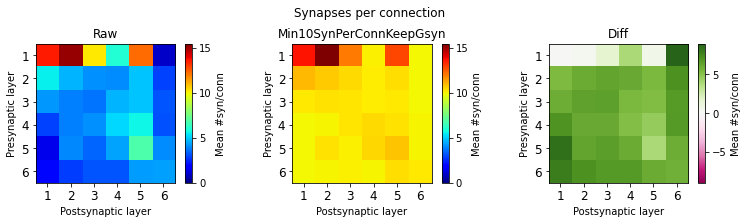

INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_manipulator/notebooks/figures/circuit-build-S1_v1/Raw_vs_Min10SynPerConnKeepGsyn/struct_comp-conn_per_layer-conn_prob.pdf...


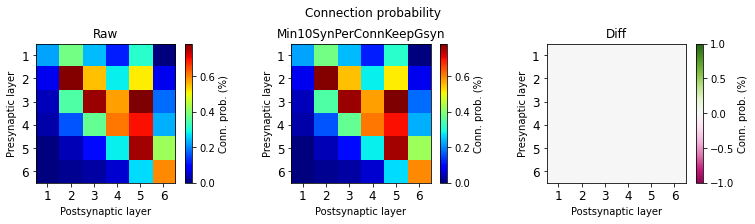

INFO: Preparing "syn_props_per_layer" plot(s)...
INFO: Loading results from ../working_dir/structural_comparator/circuit-build-S1_v1/data/Raw_syn_props_per_layer.pickle
INFO: Extracting synapse properties (group_by=layer, nrn_filter=None, N=6, per_conn=False)
INFO: Available synapse properties: 
['@source_node', '@target_node', 'afferent_center_x', 'afferent_center_y', 'afferent_center_z', 'afferent_section_id', 'afferent_section_pos', 'afferent_section_type', 'afferent_segment_id', 'afferent_segment_offset', 'afferent_surface_x', 'afferent_surface_y', 'afferent_surface_z', 'conductance', 'conductance_scale_factor', 'decay_time', 'delay', 'depression_time', 'efferent_center_x', 'efferent_center_y', 'efferent_center_z', 'efferent_section_id', 'efferent_section_pos', 'efferent_section_type', 'efferent_segment_id', 'efferent_segment_offset', 'efferent_surface_x', 'efferent_surface_y', 'efferent_surface_z', 'facilitation_time', 'n_rrp_vesicles', 'spine_length', 'syn_type_id', 'u_hill_coeff

/gpfs/bbp.cscs.ch/home/pokorny/ToposampleKernel/lib/python3.7/site-packages/bluepysnap/nodes.py:438: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pd.api.types.is_categorical(res) and not is_present:


In [ ]:
## Structural comparison of connectomes - Configuration
structcomp_config = {}

""" General settings """
structcomp_config['working_dir'] = os.path.join('..', 'working_dir', 'structural_comparator', circuit_name)
structcomp_config['out_dir'] = os.path.join('figures', circuit_name)

""" Types of structural plots """
# structcomp_config['plot_types'] = [{'name': 'inh_adjacency',
#                                     'fct': {'source': 'adjacency', 'kwargs': {'nrn_filter': {'synapse_class': 'INH'}}},
#                                     'res_sel': ['adj', 'adj_cnt'],
#                                     'range_prctile': 95,
#                                     'fig_size': (11, 3),
#                                     'fig_file': {'format': 'png', 'dpi': 600}}]

# structcomp_config['plot_types'] = [{'name': 'exc_conn_per_layer',
#                                     'fct': {'source': 'connectivity', 'kwargs': {'group_by': 'layer', 'nrn_filter': {'synapse_class': 'EXC'}}},
#                                     'res_sel': ['nsyn_conn', 'conn_prob'],
#                                     'range_prctile': 100,
#                                     'fig_size': (11, 3)}]

# structcomp_config['plot_types'] = [{'name': 'exc_inh_conn',
#                                     'fct': {'source': 'connectivity', 'kwargs': {'group_by': 'synapse_class'}},
#                                     'res_sel': ['nsyn_conn', 'conn_prob'],
#                                     'range_prctile': 100,
#                                     'fig_size': (11, 3)}]

# structcomp_config['plot_types'] = [{'name': 'overall_conn',
#                                     'fct': {'source': 'connectivity', 'kwargs': {'group_by': None}},
#                                     'res_sel': ['nsyn_conn', 'conn_prob'],
#                                     'range_prctile': 100,
#                                     'fig_size': (11, 3)}]

# structcomp_config['plot_types'] = [{'name': 'exc_syn_props_per_layer',
#                                     'fct': {'source': 'properties', 'kwargs': {'group_by': 'layer', 'nrn_filter': {'synapse_class': 'EXC'}}},
#                                     'res_sel': ['conductance', 'delay', 'afferent_section_id', 'afferent_section_pos'],
#                                     'range_prctile': 100,
#                                     'fig_size': (11, 3)}]

# structcomp_config['plot_types'] = [{'name': 'syn_props_per_layer',
#                                     'fct': {'source': 'properties', 'kwargs': {'group_by': 'layer'}},
#                                     'res_sel': ['conductance', 'delay', 'afferent_section_id', 'afferent_section_pos'],
#                                     'range_prctile': 100,
#                                     'fig_size': (11, 3)},
#                                    {'name': 'syn_props_per_mtype',
#                                     'fct': {'source': 'properties', 'kwargs': {'group_by': 'mtype'}},
#                                     'res_sel': ['conductance', 'delay', 'afferent_section_id', 'afferent_section_pos'],
#                                     'range_prctile': 100,
#                                     'fig_size': (11, 3)}]

# structcomp_config['plot_types'] = [{'name': 'conn_per_layer',
#                                     'fct': {'source': 'connectivity', 'kwargs': {'group_by': 'layer'}},
#                                     'res_sel': ['nsyn_conn', 'conn_prob'],
#                                     'range_prctile': 100,
#                                     'fig_size': (11, 3)},
#                                    {'name': 'conn_per_mtype',
#                                     'fct': {'source': 'connectivity', 'kwargs': {'group_by': 'mtype'}},
#                                     'res_sel': ['nsyn_conn', 'conn_prob'],
#                                     'range_prctile': 95,
#                                     'fig_size': (11, 3)},
#                                    {'name': 'adjacency',
#                                     'fct': {'source': 'adjacency', 'kwargs': {}},
#                                     'res_sel': ['adj', 'adj_cnt'],
#                                     'range_prctile': 95,
#                                     'fig_size': (11, 3),
#                                     'fig_file': {'format': 'png', 'dpi': 600}}]

structcomp_config['plot_types'] = [{'name': 'conn_per_layer',
                                    'fct': {'source': 'connectivity', 'kwargs': {'group_by': 'layer'}},
                                    'res_sel': ['nsyn_conn', 'conn_prob'],
                                    'range_prctile': 100,
                                    'fig_size': (11, 3)},
                                   {'name': 'syn_props_per_layer',
                                    'fct': {'source': 'properties', 'kwargs': {'group_by': 'layer', 'fct': 'np.mean'}},
                                    'res_sel': ['conductance', 'delay'],
                                    'range_prctile': 100,
                                    'fig_size': (11, 3)}]

""" Circuits to compare """
structcomp_config['circuits'] = {'0': {'circuit_config': os.path.join(manip_config['circuit_path'], 'sonata', 'circuit_config.json'),
                                       'circuit_name': 'Raw'},
                                 '1': {'circuit_config': os.path.join(manip_config['circuit_path'], 'sonata', f'circuit_config_{manip_config["manip"]["name"]}.json'),
                                       'circuit_name': manip_config['manip']['name']}}

# Structural comparison of connectomes - Run comparison
structural_comparator.main(structcomp_config, True, force_recomp=[False, True])

In [4]:
# Topological comparison of connectomes - Configuration
topocomp_config = {}

""" General settings """
topocomp_config['working_dir'] = os.path.join('..', 'working_dir', 'topological_comparator', circuit_name)
topocomp_config['out_dir'] = os.path.join('figures', circuit_name)

""" Circuits to compare """
topocomp_config['circuits'] = {'0': {'circuit_config': os.path.join(manip_config['circuit_path'], 'sonata', 'circuit_config.json'),
                                     'circuit_name': 'Raw'},
                               '1': {'circuit_config': os.path.join(manip_config['circuit_path'], 'sonata', f'circuit_config_{manip_config["manip"]["name"]}.json'),
                                     'circuit_name': manip_config['manip']['name']}}

# Topological comparison of connectomes - Prepare topological database
topocomp_force_recomp = [False, False]
topocomp_config_files = {}
for cidx in sorted(topocomp_config['circuits'].keys()):
    wrkdir = os.path.join(topocomp_config['working_dir'], topocomp_config['circuits'][cidx]['circuit_name'])
    topocomp_config_files[cidx] = os.path.join(wrkdir, 'config', 'common_config.json')
    if os.path.exists(wrkdir) and not topocomp_force_recomp[cidx]:
        print(f'INFO: Folder {wrkdir} already exists ... SKIPPING', flush=True)
    else:
        print(f'INFO: Preparing pipeline in {wrkdir}', flush=True)
        prepare_pipeline.prepare_and_place_files(topocomp_config['circuits'][cidx]['circuit_config'], 'All', wrkdir)
        extract_connectivity_sonata.main(topocomp_config_files[cidx])
        gen_topo_db.main(topocomp_config_files[cidx])


INFO: Folder ../working_dir/topological_comparator/circuit-build-S1_v1/Raw already exists ... SKIPPING
INFO: Folder ../working_dir/topological_comparator/circuit-build-S1_v1/RewireAxonsL4PC-L5PC already exists ... SKIPPING


Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/connectome_manipulator/notebooks/figures/circuit-build-S1_v1/Raw_vs_RewireAxonsL4PC-L5PC/topo_comp-all_params.pdf...


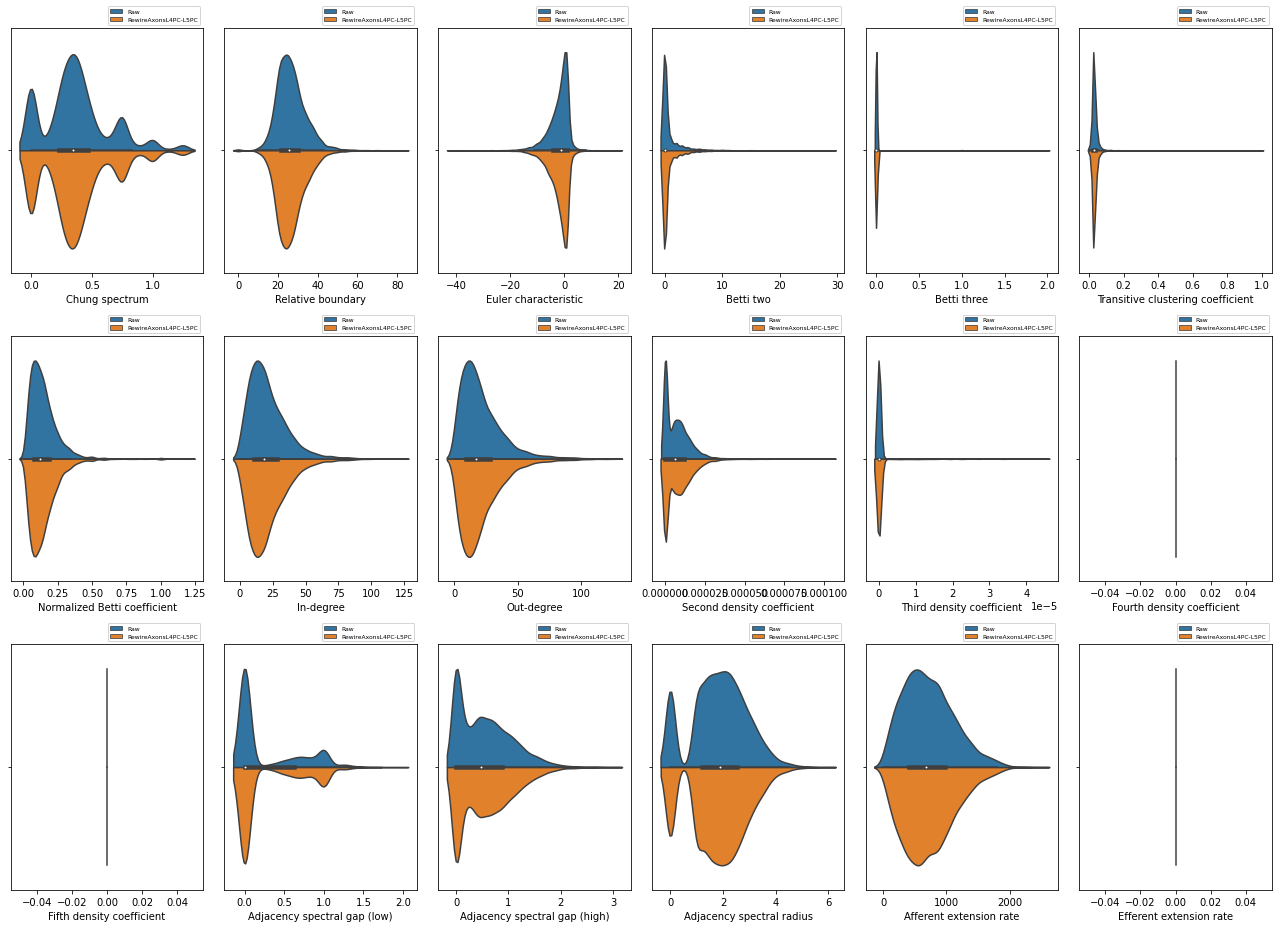

Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/connectome_manipulator/notebooks/figures/circuit-build-S1_v1/Raw_vs_RewireAxonsL4PC-L5PC/topo_comp-all_params-per_mtype.pdf...


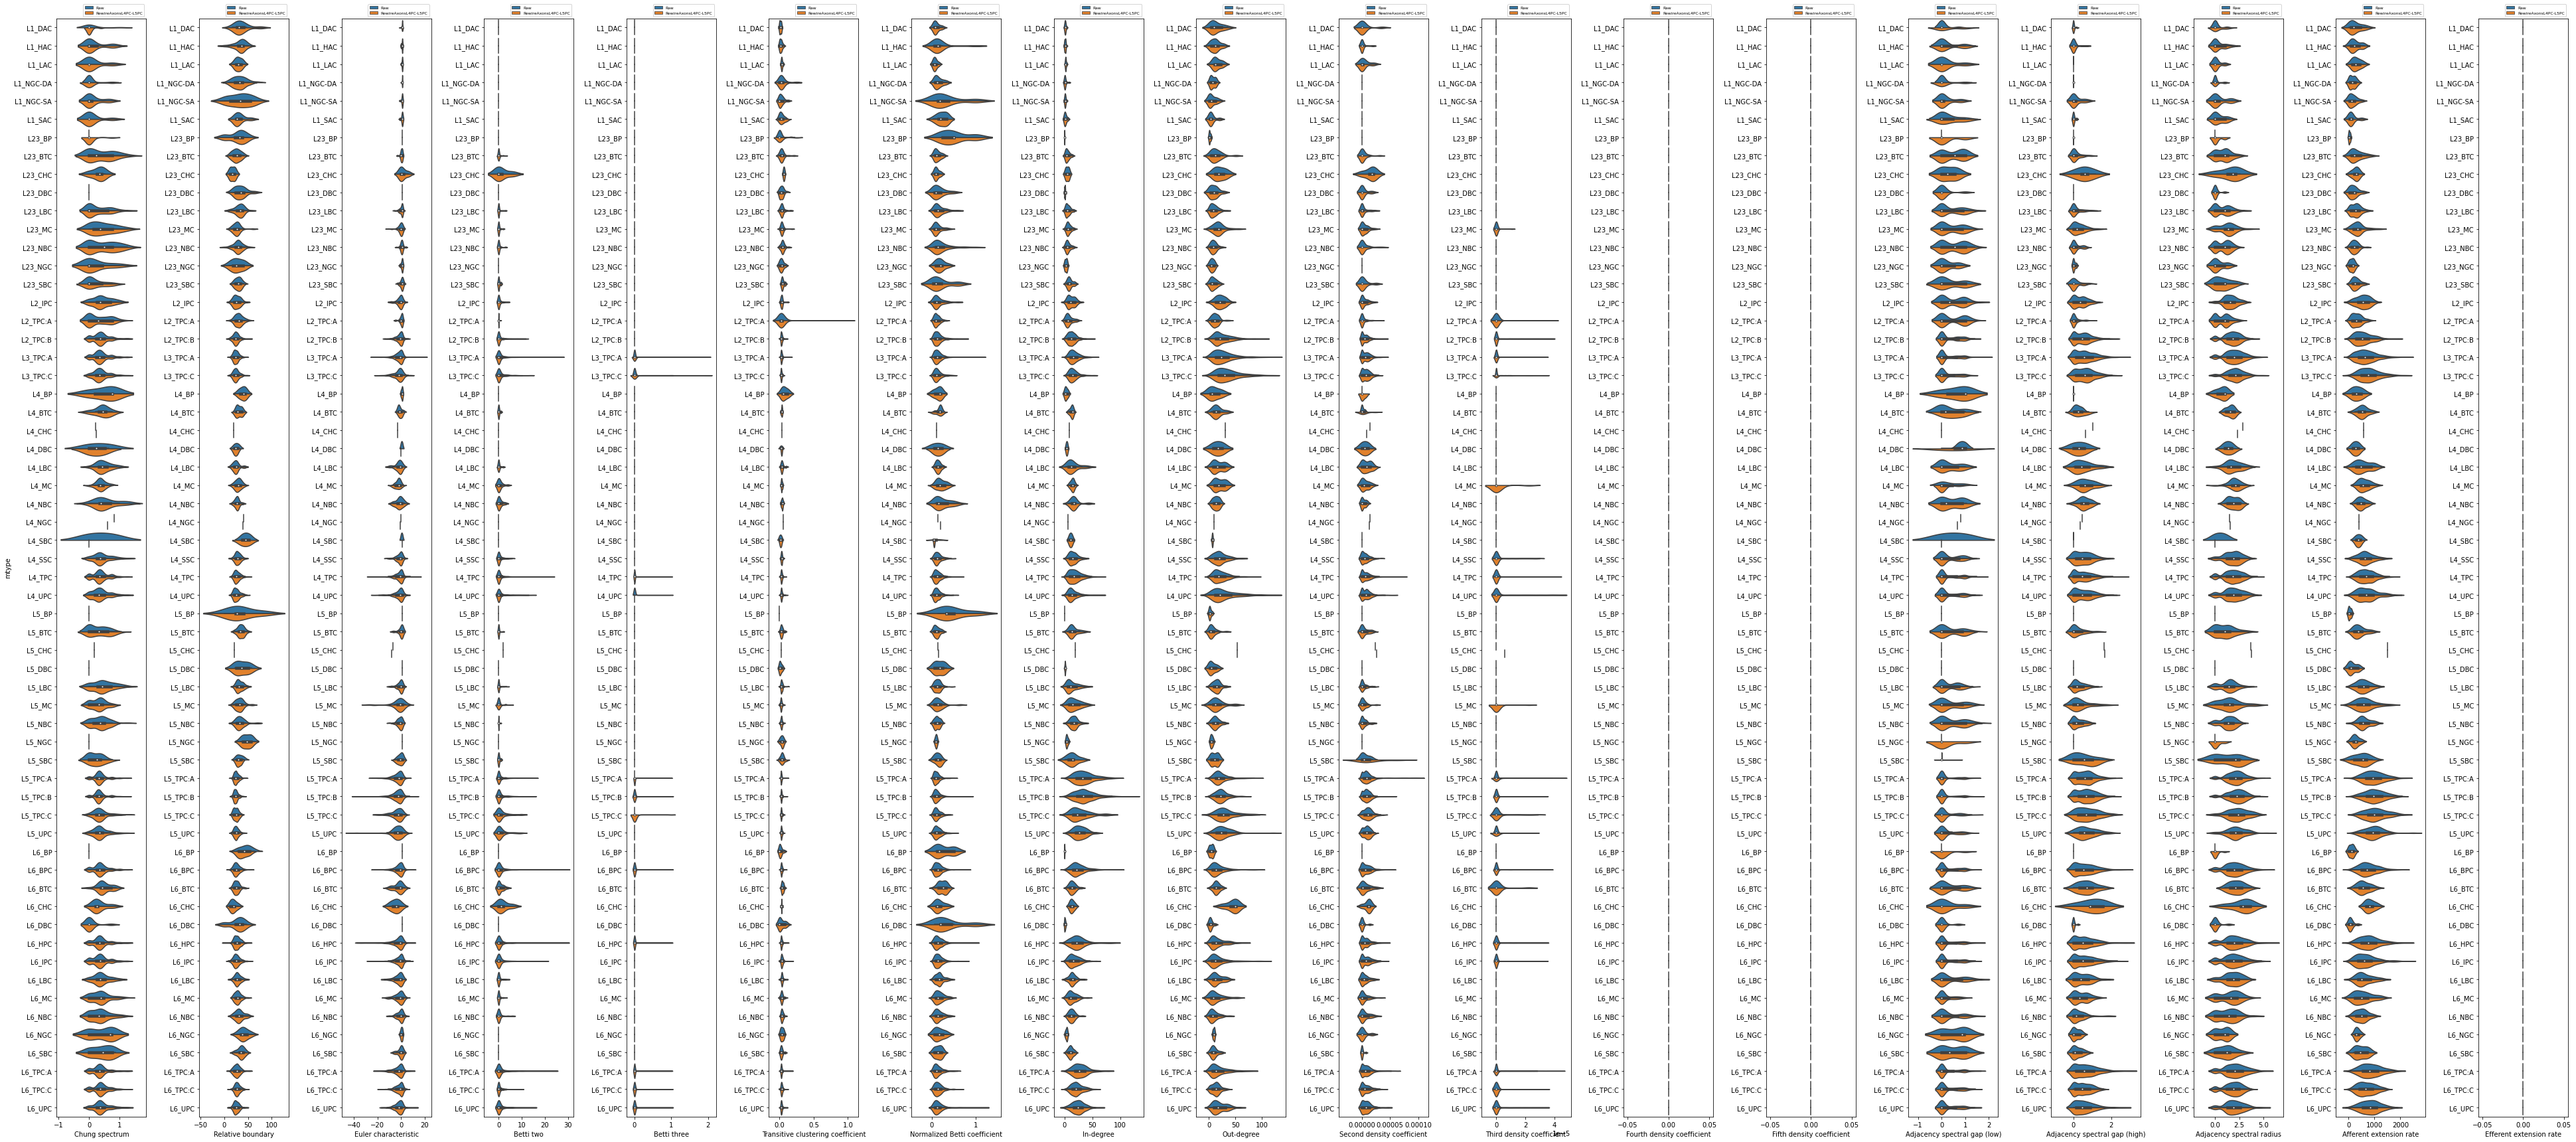

Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/connectome_manipulator/notebooks/figures/circuit-build-S1_v1/Raw_vs_RewireAxonsL4PC-L5PC/topo_comp-all_params-per_layer.pdf...


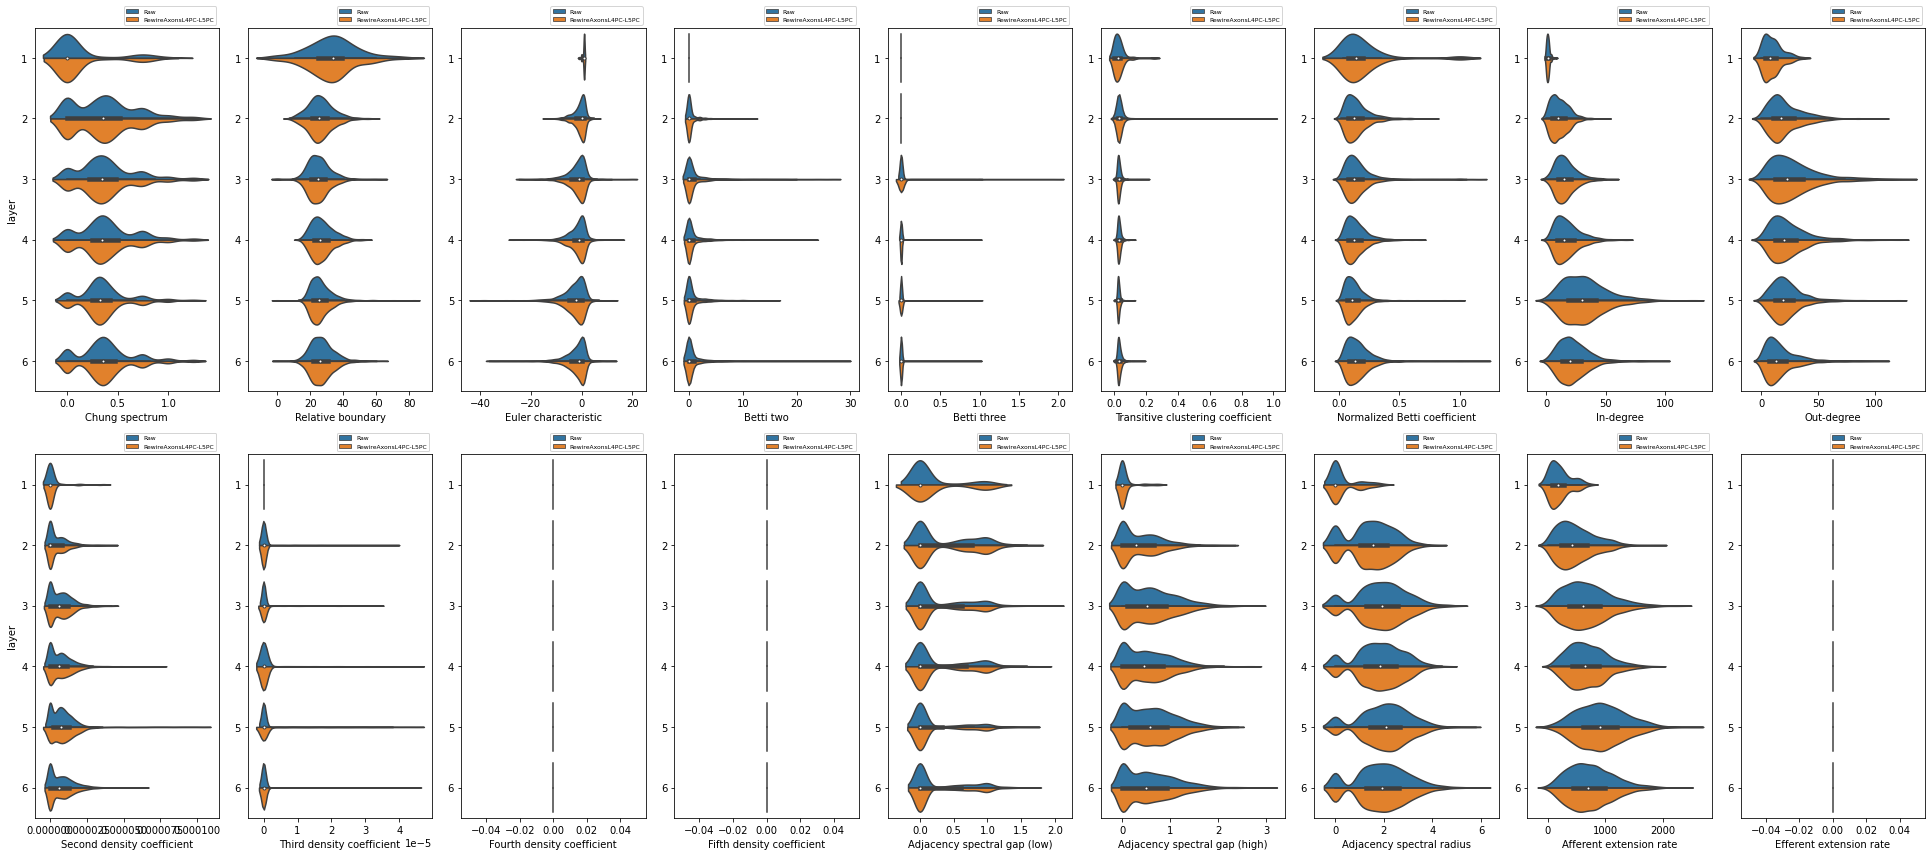

In [5]:
# Topological comparison of connectomes - Plot comparison
topocomp_db_dict, topocomp_param_dict = compare_topo_db.read_topo_dbs_and_parameter_specs({topocomp_config['circuits'][cidx]['circuit_name']: topocomp_config_files[cidx] for cidx in sorted(topocomp_config_files.keys())})
compare_topo_db.plot_comparison_combined(topocomp_db_dict, topocomp_param_dict, '', topocomp_config['out_dir'], num_rows=3, show_fig=True)
compare_topo_db.plot_comparison_combined(topocomp_db_dict, topocomp_param_dict, 'mtype', topocomp_config['out_dir'], num_rows=1, show_fig=True)
compare_topo_db.plot_comparison_combined(topocomp_db_dict, topocomp_param_dict, 'layer', topocomp_config['out_dir'], num_rows=2, show_fig=True)
